#### Problem Statement

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("C:/Users/Hrushikesh/Desktop/Flight_Ticket_Participant_Datasets/Data_Train.xlsx")
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


The train dataset contains the detail of the price of flight for various airlines between the months of March and June of 2019 and between various cities and data set contained both numerical and categorical data here price is the target variable and as it has continuous data it is a regression problem.

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.shape

(10683, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

We can see that the train data has only object and integer type data

In [7]:
#converting Date and Time columns from object type to DateTime type

data['Date_of_Journey']= pd.to_datetime(data['Date_of_Journey'])
data['Dep_time'] = pd.to_datetime(data['Dep_Time'])
data['Arrival_Time'] = pd.to_datetime(data['Arrival_Time'])

In [8]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Dep_time           datetime64[ns]
dtype: object

We have converted object datatype into datetime datatype.

In [9]:
data['Journey_Day'] = pd.to_datetime(data.Date_of_Journey,format="%d/%m/&Y").dt.day
data['Journey_Month'] = pd.to_datetime(data.Date_of_Journey,format="%d/%m/%Y").dt.month

I have splitted Date_of_Journeyt into Month and Day, and the datset contains only 2019 year data no need to take year column.

In [10]:
#dropping Date_of_journey column
data.drop("Date_of_Journey",axis=1,inplace=True)

In [11]:
data['Duration'] = data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
data['Duration'] = pd.to_numeric(data['Duration'])

In [12]:
#Extracting Hours and ,mins from Dep_Time column 
data['Dep_Hour'] = pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_Min'] = pd.to_datetime(data['Dep_Time']).dt.minute

In [15]:
data.drop("Dep_Time",axis=1,inplace=True)

In [16]:
#Extracting Arrival Hour from Arrival_Time Column
data['Arrival_Hour']=pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_Min']=pd.to_datetime(data['Arrival_Time']).dt.minute
data.drop("Arrival_Time",axis=1,inplace=True)

KeyError: 'Arrival_Time'

In [17]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,3,1,16,50,21,35


In [18]:
data.shape

(10683, 14)

Now the dataset has 10683 rows and 14 columns

In [19]:
#checking value counts of each column 
for i in data.columns:
    print(data[i].value_counts())
    print("\n")

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                              

These are the unique values present in the columns.

From the above list of unique values,we can observe some repeated categories in some columns.

In [20]:
data['Airline']=data['Airline'].replace("Jet Airways Business","Jet Airways")
data['Airline']=data['Airline'].replace("Multiple carriers Premium economy","Multiple carriers")
data['Airline']=data['Airline'].replace("Vistara Premium economy","Vistara")
data['Destination']= data['Destination'].replace("New Delhi","Delhi")
data['Additional_Info']= data['Additional_Info'].replace("No info", "No Info")
data['Additional_Info']= data['Additional_Info'].replace(["1 Long layover","2 Long layover"],"Long layover")

In [21]:
val_count = ["Airline","Destination","Additional_Info"]

for i in val_count:
    print(data[i].value_counts())
    print("\n")

Jet Airways          3855
IndiGo               2053
Air India            1752
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64


Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


No Info                         8348
In-flight meal not included     1982
No check-in baggage included     320
Long layover                      20
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64




In [22]:
data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

We can pbserve null values in Rout and Total_Stops columns. As both the columns have categorical data, we can fill them using mode.

In [23]:
data['Route'] = data['Route'].fillna(data['Route'].mode()[0])
data['Total_Stops']= data['Total_Stops'].fillna(data['Total_Stops'].mode()[0])

In [24]:
data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

<AxesSubplot:>

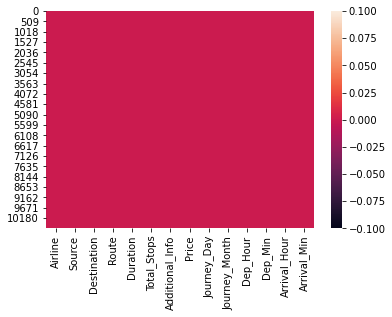

In [25]:
sns.heatmap(data.isnull())

So it is cleare from the visaualization there are no null values.

In [26]:
# Checking uniqueness of the target column
data['Price'].unique()

array([ 3897,  7662, 13882, ...,  9790, 12352, 12648], dtype=int64)

These are the unique values present in the target columns

In [27]:
data.loc[data['Price']==" "]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min


There is no space in any of the column

In [28]:
data.describe()

,Duration,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,643.093232,9087.064121,12.682205,5.534775,12.490686,24.411214,13.348778,24.690630
std,507.862001,4611.359167,8.803701,2.987489,5.748650,18.767980,6.859125,16.506036
min,5.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,170.000000,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,520.000000,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,930.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,2860.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000


This gives statistical information of the data set

- The count of all columns are same which means there is no missing value present in the data set

- The mean value is greater than median in the column price, journey_day, duration and Dep_Hour so we can say that they are screwed to the right.

- The median is beat greater than mean in Dep_mean, arrival_hour and arrival_mean which means they are skewed to left

- There is a huge difference in maximum and 75 percentile in the column price, arrival mean which leads to outlets in those columns

- 

<function matplotlib.pyplot.show(close=None, block=None)>

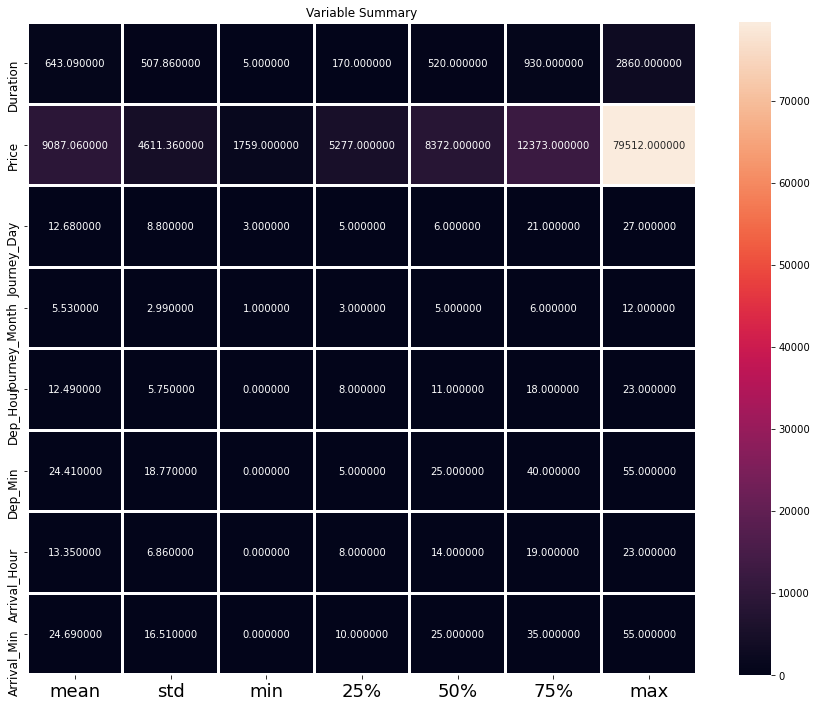

In [29]:
plt.figure(figsize=(15,12))
sns.heatmap(round(data.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show

In [30]:
# Checking for Categirical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [31]:
# Checking for Numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Duration', 'Price', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


# Data Visualization

Jet Airways          3855
IndiGo               2053
Air India            1752
Multiple carriers    1209
SpiceJet              818
Vistara               482
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64


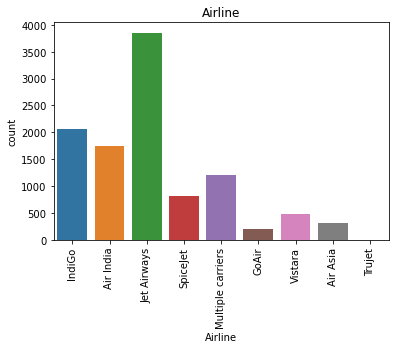

In [32]:
print(data['Airline'].value_counts())
sns.countplot(data['Airline'])
plt.title("Airline")
plt.xticks(rotation=90)
plt.show()

Jet AIrways flights has high counts whereas Trujet and GoAir has the least counts.

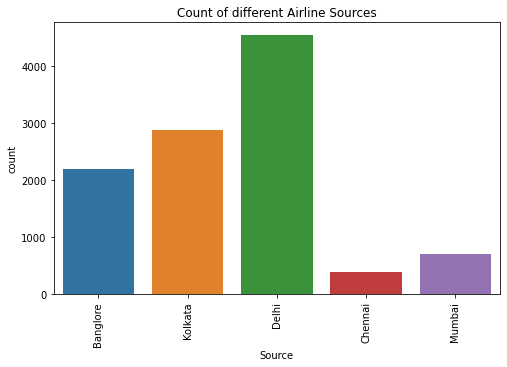

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(data['Source'])
plt.title("Count of different Airline Sources")
plt.xticks(rotation=90)
plt.show()

The majority of Airline source is from Delhi while least is from Chennai

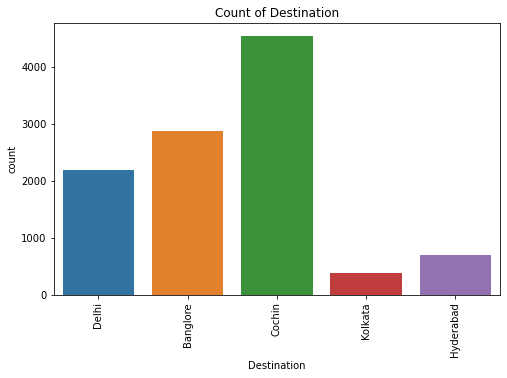

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(data['Destination'])
plt.title("Count of Destination")
plt.xticks(rotation=90)
plt.show()

The count of Cochin is highest. Most of the flights destination is cochin

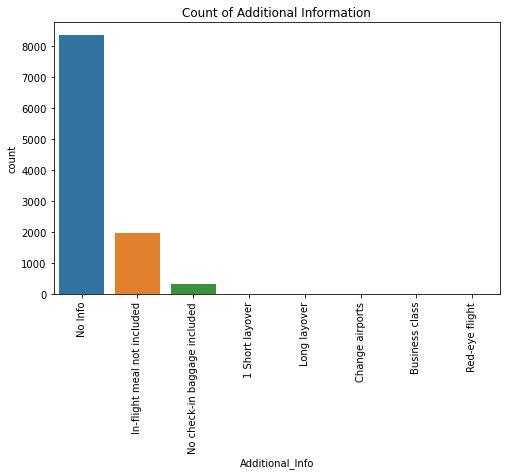

In [35]:
plt.figure(figsize=(8,5))
sns.countplot(data['Additional_Info'])
plt.title("Count of Additional Information")
plt.xticks(rotation=90)
plt.show()

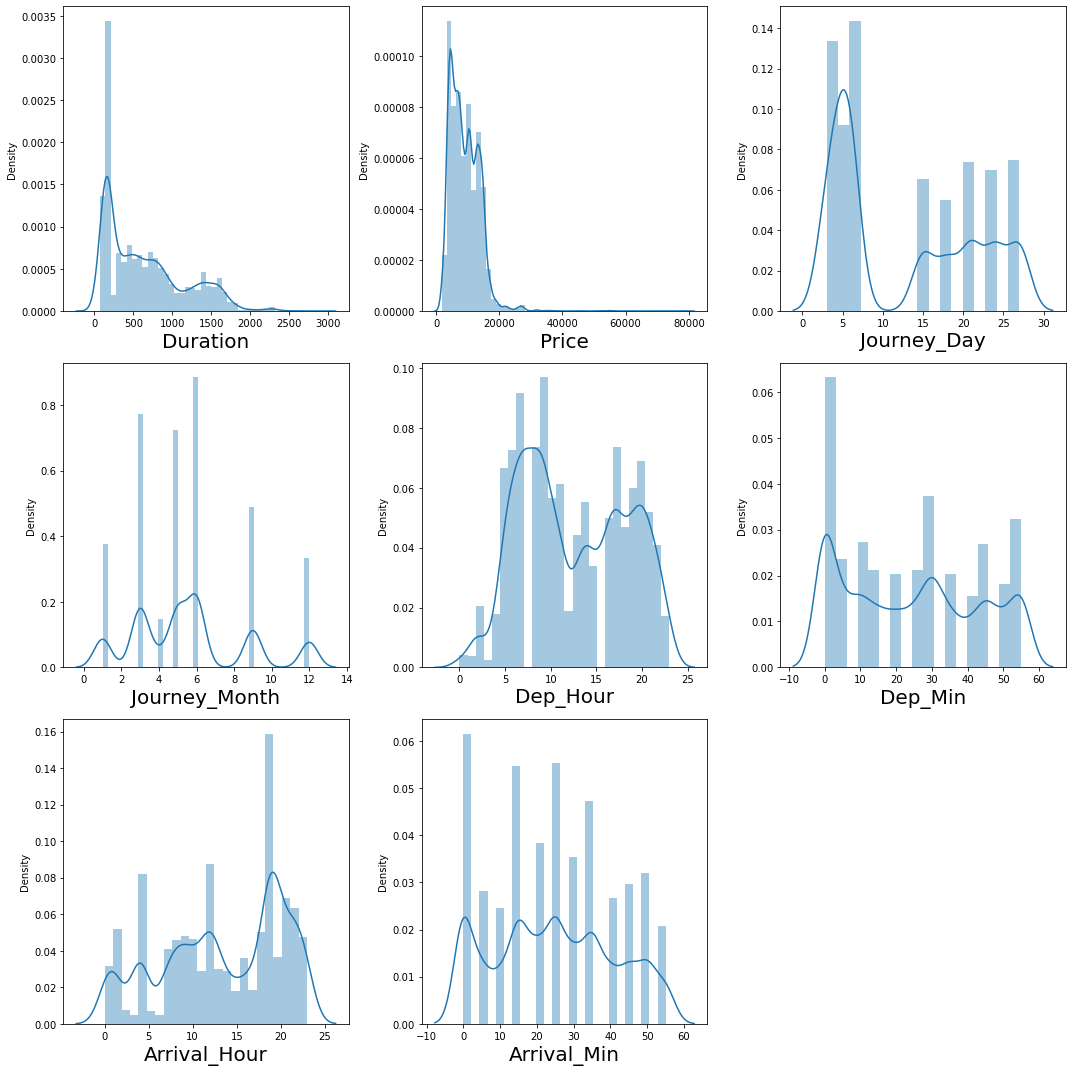

In [36]:
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From the distribution plot we can observe that the data is not normally distributed in some columns and some columns are almost normal but donty have proper bell shape curve. The Journey_Month, Duration and Price columns are skewed to right as mean is more than than the median

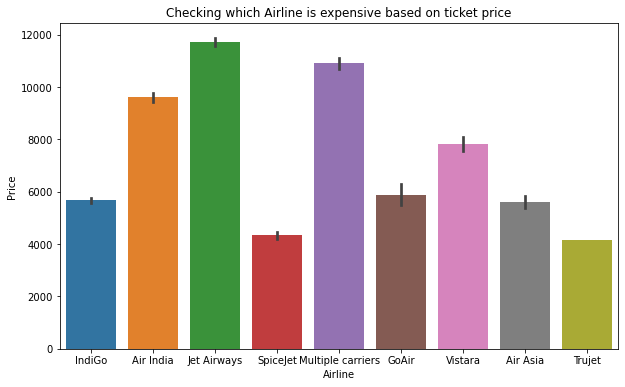

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(data['Airline'],data['Price'], data=data)
plt.title("Checking which Airline is expensive based on ticket price")
plt.show()


- The barplot shows JetAirways is most expensive airline followed by Multiple carriers and Air India

- The Trujet and Spicejet have low low ticket prices compared to others

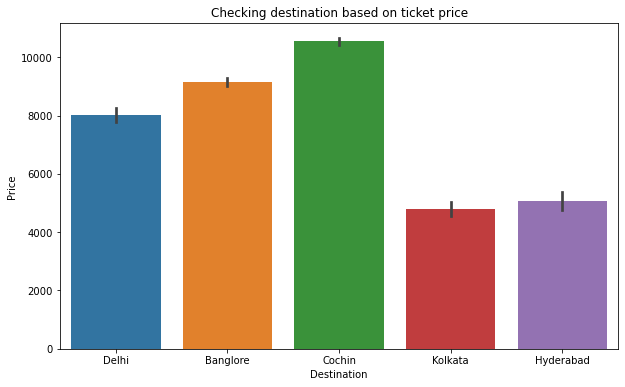

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(data['Destination'],data['Price'], data=data)
plt.title("Checking destination based on ticket price")
plt.show()


The ticket price is high cochin destination followed by Banglore

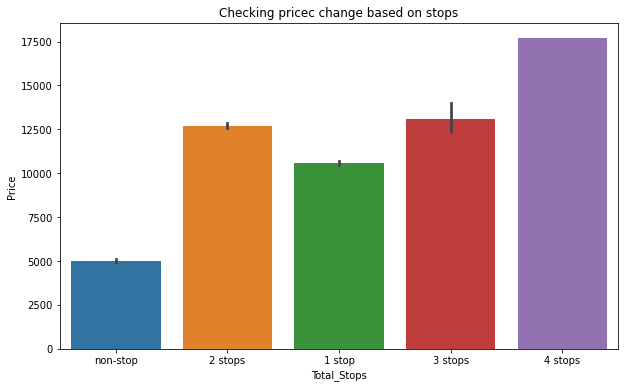

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(data['Total_Stops'],data['Price'], data=data)
plt.title("Checking pricec change based on stops")
plt.show()

We can see flights with forced of highest price followed by flight saving three stop end of light which have no stock is having very less ticket price compared to others

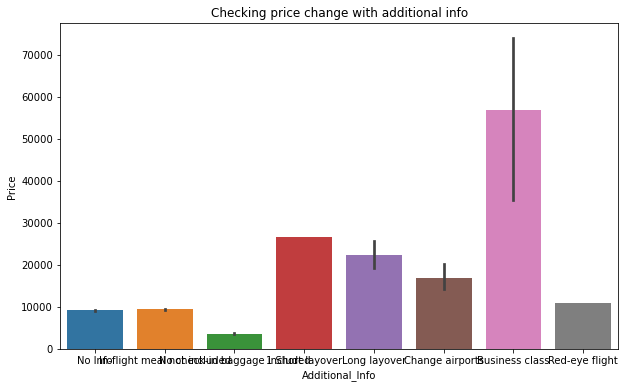

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(data['Additional_Info'],data['Price'], data=data)
plt.title("Checking price change with additional info")
plt.show()

This plots shows that the business class flights are more expensive compared to other and flight having the class No check-in baggage included has very least ticket price.

<AxesSubplot:xlabel='Dep_Hour', ylabel='Price'>

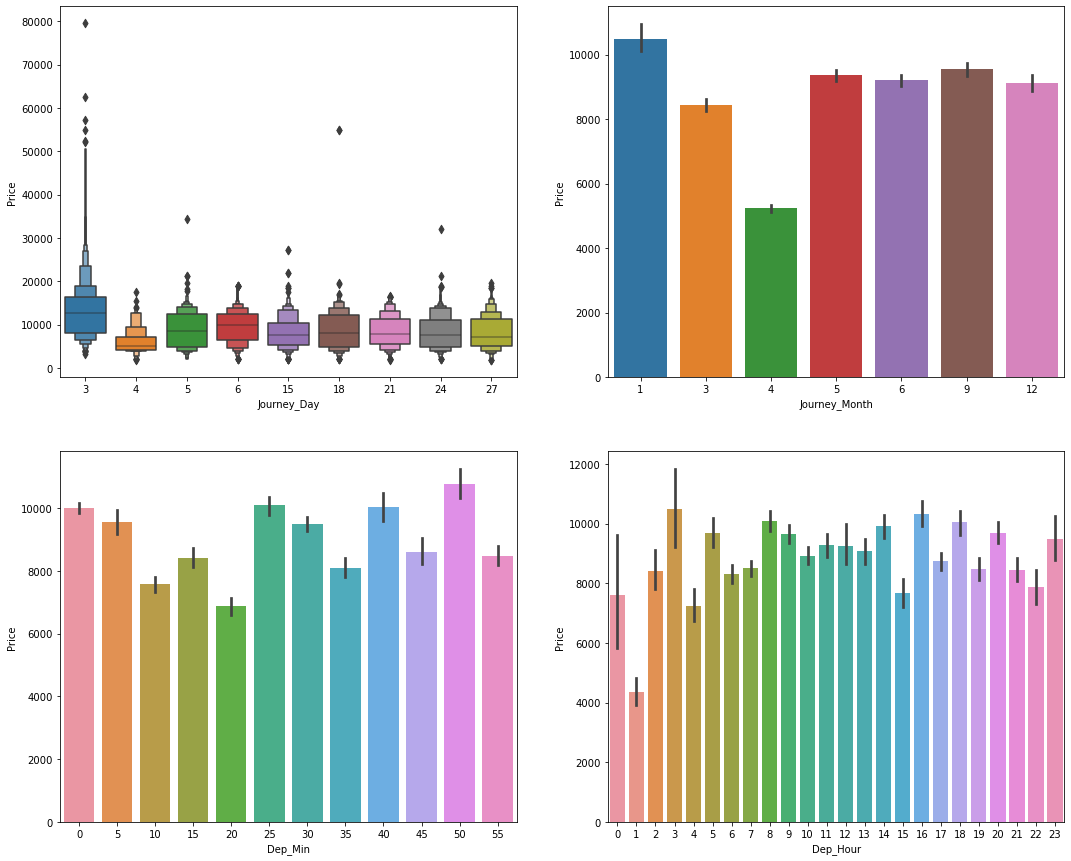

In [41]:
fig, axes = plt.subplots(2,2,figsize=(18,15))
sns.boxenplot(x='Journey_Day',y='Price',ax=axes[0,0],data=data)
sns.barplot(x='Journey_Month',y='Price',ax=axes[0,1],data=data)
sns.barplot(x='Dep_Min',y='Price',ax=axes[1,0],data=data)
sns.barplot(x='Dep_Hour',y='Price',ax=axes[1,1],data=data)

While comparing journey_day and price we can see the price of ticket is high in day 3 apart from this there is no much impact of day on bridesticket price.

while comparing journey underscore month and price we Can stay dad flights travelling in January month are more expensive than others and the flights travelling in April month have we cheap ticket prices

There is no significant relationship between Dep_min and price of the ticket

In the 4th graph we also see that there is no much impact of Dep_hour on times

# Outliers

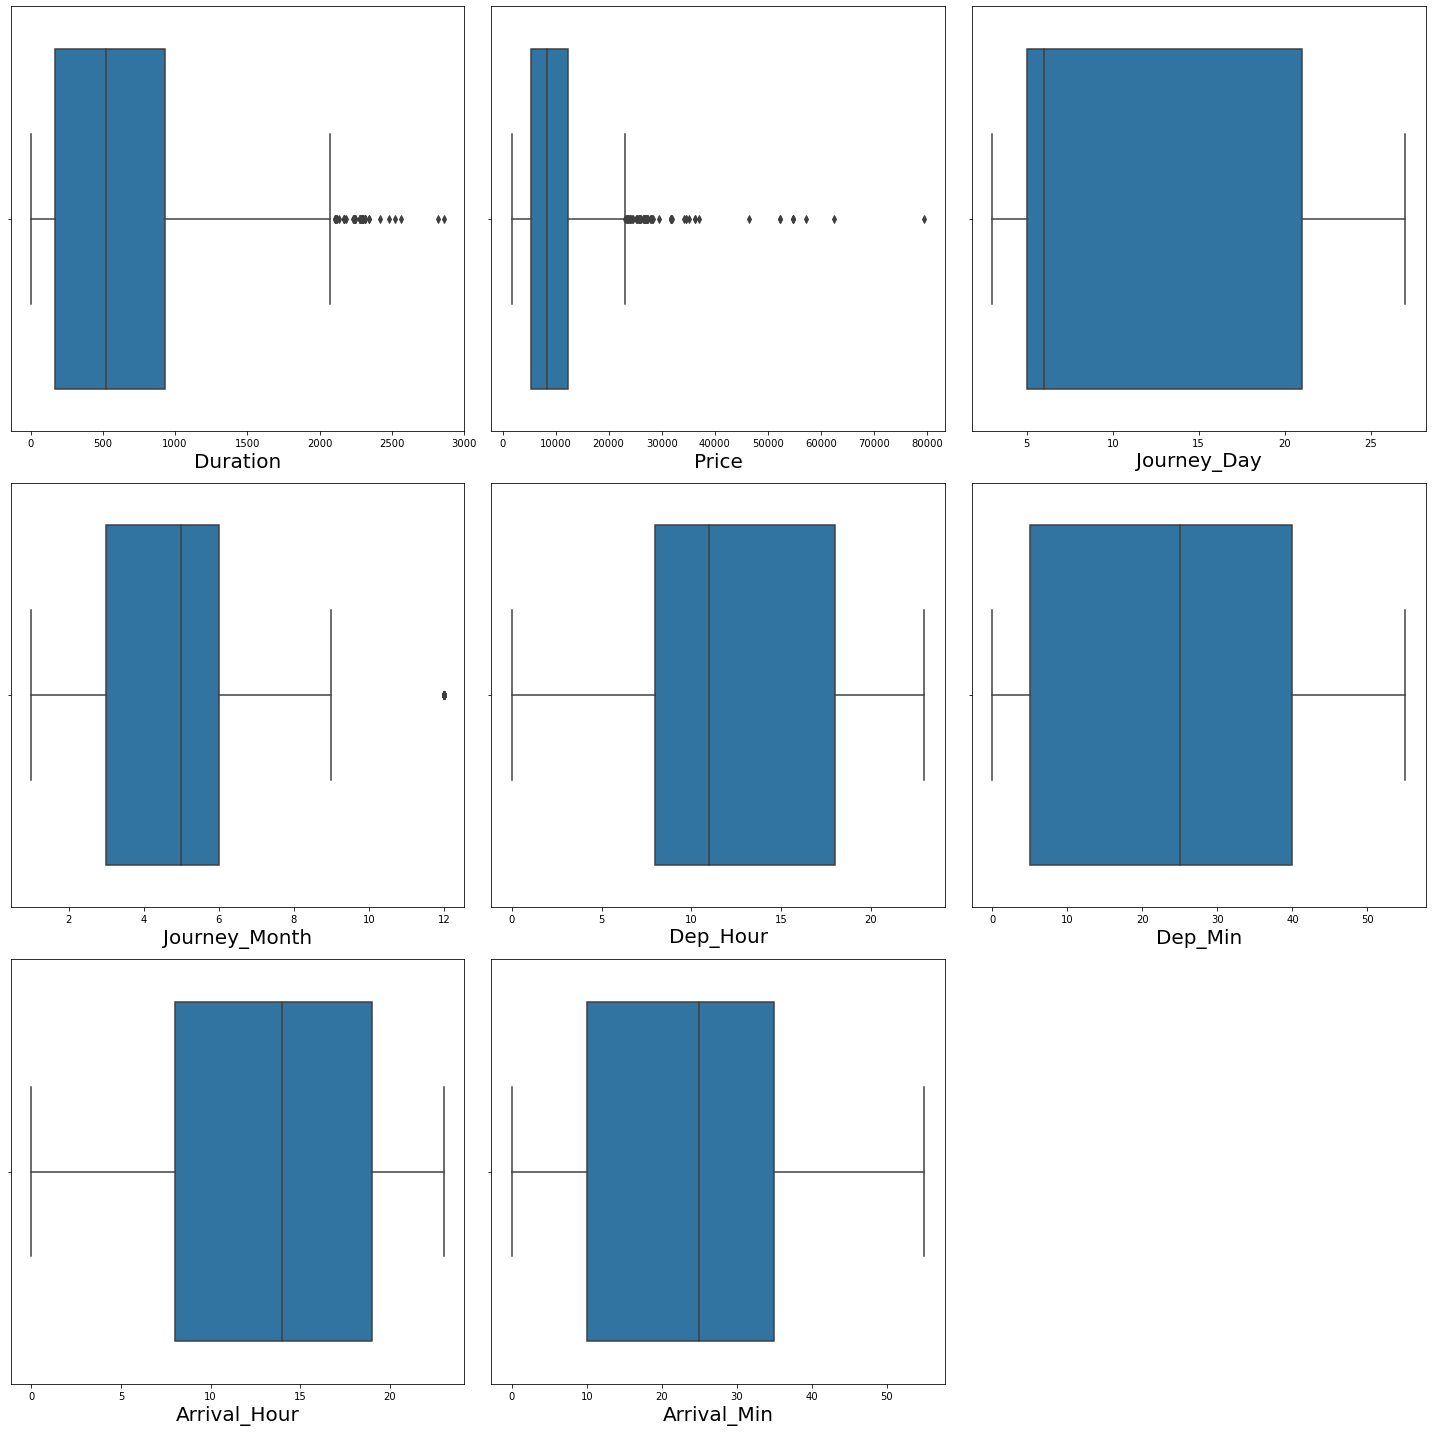

In [42]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- The outliers are present in the columns duration, journey_month and target variable price

- Since price is the target column so no need to remove the outliers from the column

- We need to remove the outliers from the other two columns using zsquare or IQR methods

In [43]:
from scipy.stats import zscore
features = data[["Duration","Journey_Month"]]
z = np.abs(zscore(features))
z

new_data = data[(z<3).all(axis=1)]
new_data

print(data.shape)
print(new_data.shape)

(10683, 14)
(10617, 14)


In [44]:
loss = (10683-10617)/10683*100
loss


0.6178039876439202

Here we are losing very less data. Lets try using IQR

In [45]:
# 1st quantile
Q1 = features.quantile(0.25)

# 3rd Quantile
Q3 = features.quantile(0.75)

#IQR
IQR = Q3-Q1

data1 = data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR))).any(axis=1)]


In [46]:
data1.shape

(9657, 14)

In [47]:
loss = (10683-9657)/10683*100
loss

9.604043807919124

Using IQR method we are losing 9.6% data. Lets consider zscore

# Skewness

In [48]:
new_data.skew()

Duration         0.774266
Price            1.824502
Journey_Day      0.367029
Journey_Month    0.628224
Dep_Hour         0.103798
Dep_Min          0.164551
Arrival_Hour    -0.361250
Arrival_Min      0.107805
dtype: float64

- Here skewness threshold is taken as +/-0.65

- We can find the skewness present in the price, duration and journey_months columns.




In [49]:
new_data['Duration'] = np.log1p(new_data['Duration'])
new_data['Journey_Month'] = np.log1p(new_data['Journey_Month'])

In [50]:
new_data.skew()

Duration        -0.178335
Price            1.824502
Journey_Day      0.367029
Journey_Month   -0.533689
Dep_Hour         0.103798
Dep_Min          0.164551
Arrival_Hour    -0.361250
Arrival_Min      0.107805
dtype: float64

We can see the skewness has been removed

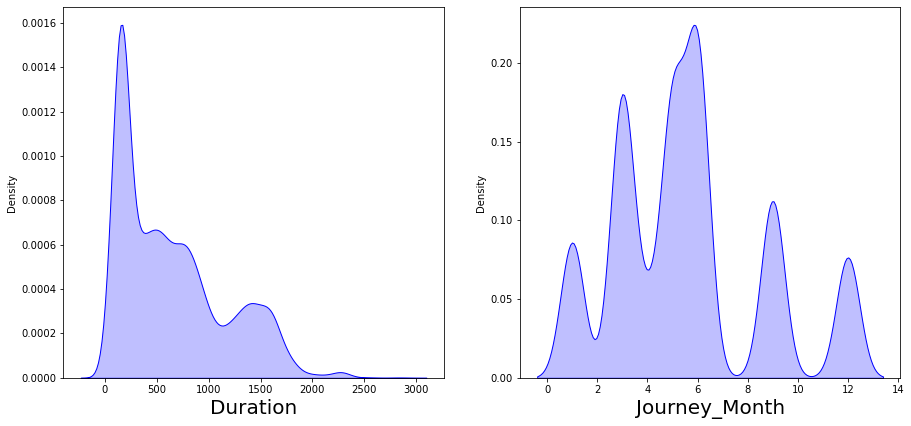

In [51]:
# After removing skewness,visualizing the dta distribution in each column.
features_skewed = ["Duration","Journey_Month"]
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in new_data[features_skewed]:
    if plotnumber<=18:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(data[column],color='b',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data looks almost normal and skewness is also removed

# Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
new_data[categorical_col]=new_data[categorical_col].apply(lbl.fit_transform)
new_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,2,18,5.141664,4,5,3897,24,1.386294,22,20,1,10
1,1,3,0,84,6.100319,1,5,7662,5,0.693147,5,50,13,15
2,4,2,1,118,7.039660,1,5,13882,6,2.302585,9,25,4,25
3,3,3,0,91,5.786897,0,5,6218,5,2.564949,18,5,23,30
4,3,0,2,29,5.655992,0,5,13302,3,0.693147,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,5.017280,4,5,4107,4,2.302585,19,55,22,25
10679,1,3,0,64,5.049856,4,5,4145,27,1.609438,20,45,23,20
10680,4,0,2,18,5.198497,4,5,7229,27,1.609438,8,20,11,20
10681,8,0,2,18,5.081404,4,5,12648,3,0.693147,11,30,14,10


# Correlation

In [53]:
corr = new_data.corr()
corr

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
Airline,1.000000,-0.013641,0.055391,0.021921,-0.077818,-0.010497,-0.056234,0.024773,0.025366,0.005402,-0.028238,-0.070340,-0.005868,-0.087465
Source,-0.013641,1.000000,-0.434677,0.404009,0.122739,-0.225922,-0.034128,0.016718,0.007158,0.062011,0.059469,-0.055929,0.026144,0.021640
Destination,0.055391,-0.434677,1.000000,-0.230755,-0.509154,0.510659,0.115602,-0.263334,0.007309,-0.061873,-0.088810,0.097052,-0.058190,0.006954
Route,0.021921,0.404009,-0.230755,1.000000,0.368475,-0.439372,0.002232,0.163635,0.096042,0.076196,-0.070005,-0.066420,0.011514,-0.174071
Duration,-0.077818,0.122739,-0.509154,0.368475,1.000000,-0.809980,-0.251284,0.605786,-0.042848,0.061807,-0.001689,-0.033797,0.056730,-0.125315
Total_Stops,-0.010497,-0.225922,0.510659,-0.439372,-0.809980,1.000000,0.234493,-0.572413,0.043711,-0.048791,0.038512,0.049105,-0.095213,0.176915
Additional_Info,-0.056234,-0.034128,0.115602,0.002232,-0.251284,0.234493,1.000000,-0.114590,-0.012301,-0.025319,-0.052282,0.008984,-0.005902,0.044179
Price,0.024773,0.016718,-0.263334,0.163635,0.605786,-0.572413,-0.114590,1.000000,-0.163765,-0.013511,0.011430,-0.025585,0.021107,-0.088909
Journey_Day,0.025366,0.007158,0.007309,0.096042,-0.042848,0.043711,-0.012301,-0.163765,1.000000,-0.097582,-0.002628,-0.017421,-0.001501,-0.021901
Journey_Month,0.005402,0.062011,-0.061873,0.076196,0.061807,-0.048791,-0.025319,-0.013511,-0.097582,1.000000,0.020587,-0.005264,-0.005743,-0.031453


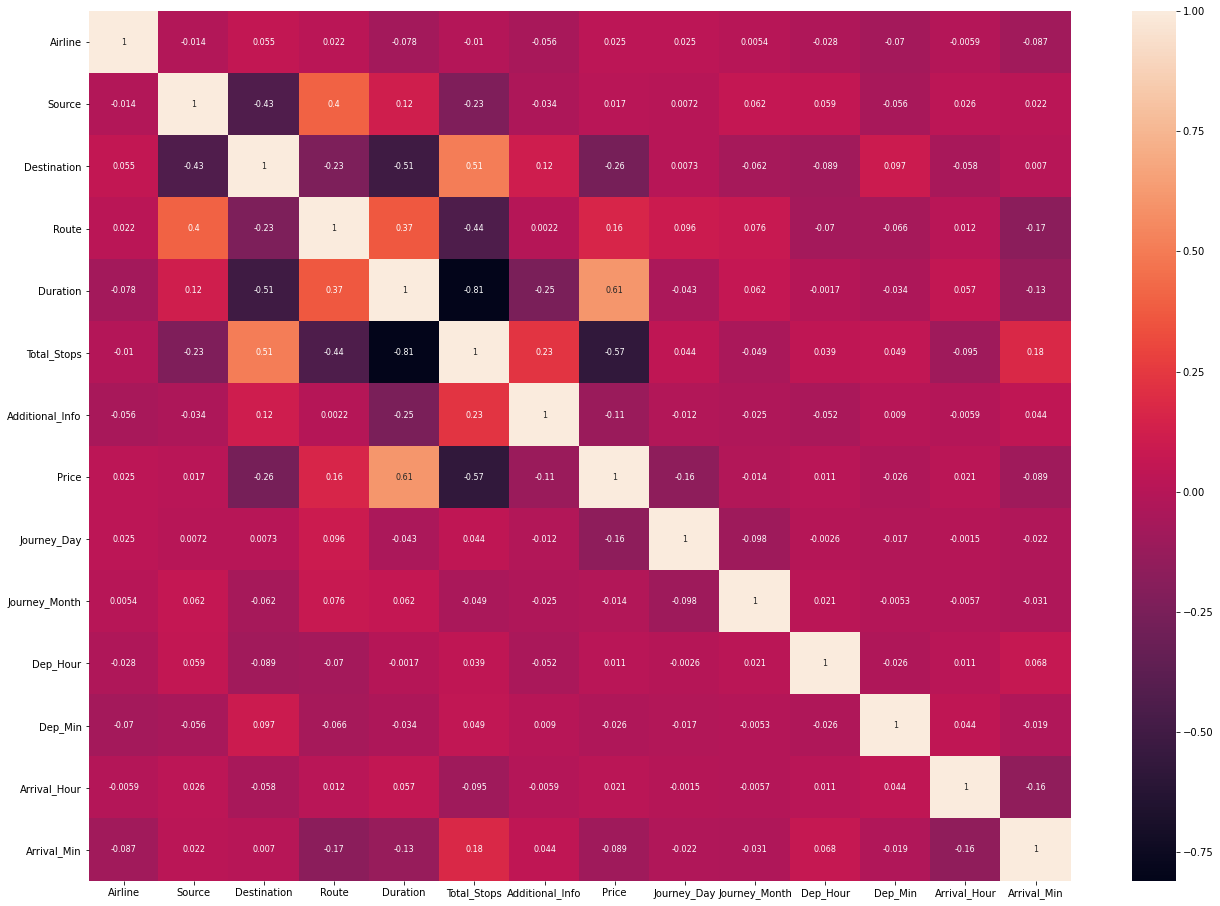

In [54]:

plt.figure(figsize=(22,16))
sns.heatmap(new_data.corr(), annot=True, annot_kws={'size':8})
plt.show()

- This heatmap shows the correlation matrix by visualising the data

- This heat map contains both positive and negative correlation.

- The Duration is highly Positively correlated with the target variable Price

- The Total_Stops is highly negatively correlated with the label.

- The features duration, total_stops and destination are highly negatively correlated with each other this may lead to multicollinearity problem

In [55]:
corr['Price'].sort_values(ascending=False)

Price              1.000000
Duration           0.605786
Route              0.163635
Airline            0.024773
Arrival_Hour       0.021107
Source             0.016718
Dep_Hour           0.011430
Journey_Month     -0.013511
Dep_Min           -0.025585
Arrival_Min       -0.088909
Additional_Info   -0.114590
Journey_Day       -0.163765
Destination       -0.263334
Total_Stops       -0.572413
Name: Price, dtype: float64

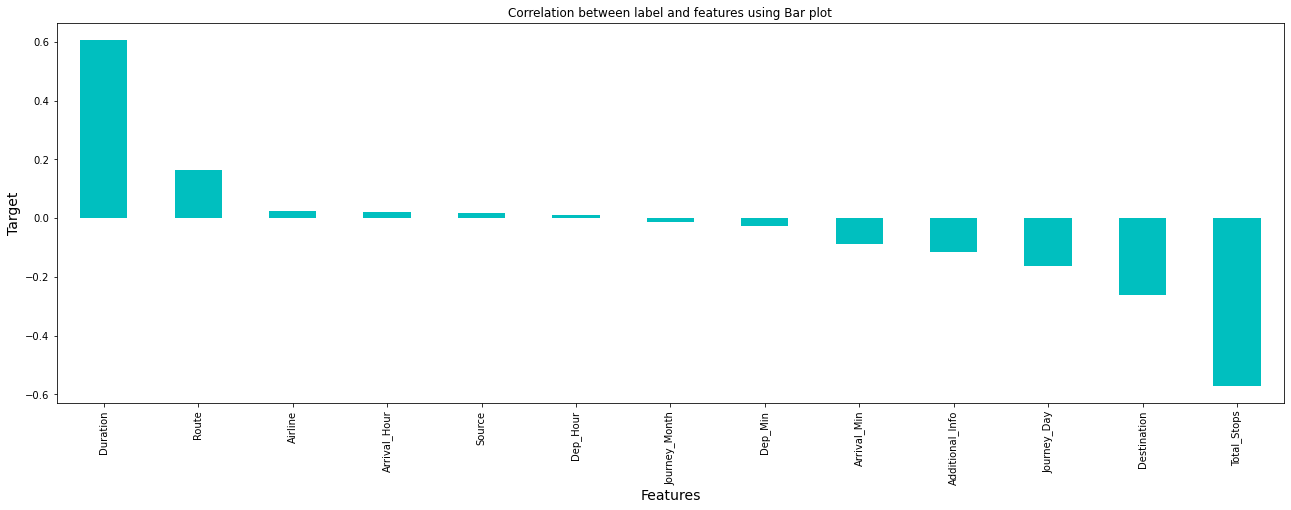

In [56]:
plt.figure(figsize=(22,7))
new_data.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and features using Bar plot')
plt.show()

The features Journey_Month, Source, Arruval_Hour,Dep_Hour and Airline have very less correlation with the label so we can drop these columns.

# Separating Features and labels

In [57]:
x = new_data.drop('Price',axis=1)
y= new_data['Price']

In [58]:
x.shape

(10617, 13)

In [59]:
y.shape

(10617,)

# Standard Scalar

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,-0.345488,-1.655042,0.812707,-1.544003,-1.058285,1.402360,0.424603,1.286176,-0.754967,1.649475,-0.235894,-1.794784,-0.889208
1,-1.464134,0.888124,-1.157048,0.254498,0.007344,-0.253797,0.424603,-0.873920,-2.141814,-1.312186,1.362715,-0.046050,-0.586465
2,0.213836,0.040402,-0.172170,1.180998,1.051504,-0.253797,0.424603,-0.760231,1.078344,-0.615325,0.030541,-1.357601,0.019019
3,-0.345488,0.888124,-1.157048,0.445248,-0.341051,-0.805850,0.424603,-0.873920,1.603281,0.952614,-1.035199,1.411228,0.321762
4,-0.345488,-1.655042,0.812707,-1.244253,-0.486564,-0.805850,0.424603,-1.101299,-2.141814,0.604183,1.362715,1.119772,0.624504
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10612,-2.023458,0.888124,-1.157048,-0.290502,-1.196549,1.402360,0.424603,-0.987609,1.078344,1.126829,1.629150,1.265500,0.019019
10613,-1.464134,0.888124,-1.157048,-0.290502,-1.160337,1.402360,0.424603,1.627244,-0.308502,1.301044,1.096280,1.411228,-0.283723
10614,0.213836,-1.655042,0.812707,-1.544003,-0.995110,1.402360,0.424603,1.627244,-0.308502,-0.789540,-0.235894,-0.337506,-0.283723
10615,2.451129,-1.655042,0.812707,-1.544003,-1.125269,1.402360,0.424603,-1.101299,-2.141814,-0.266894,0.296976,0.099677,-0.889208


# VIF

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.043901,Airline
1,1.529957,Source
2,1.773160,Destination
3,1.561303,Route
4,3.307864,Duration
5,3.393121,Total_Stops
6,1.103963,Additional_Info
7,1.035535,Journey_Day
8,1.022210,Journey_Month
9,1.031697,Dep_Hour


There is no multicollinearity exists as all the values are less than 10

# Modeling

In [62]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [63]:
from sklearn.ensemble import RandomForestRegressor
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    model = RandomForestRegressor()
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is", maxAccu,"at random state",maxRS)

Maximum r2 score is 0.9168224884509227 at random state 180


In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=180)


# Regression Algoritham

In [65]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor

from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics

# RandomForestRegressor

In [66]:
RF = RandomForestRegressor()
RF.fit(x_train,y_train)
pred_RF = RF.predict(x_test)
print("R2_score:",r2_score(y_test,pred_RF))

# Mean  Absolute Error(MAE)
print('MAE:',metrics.mean_absolute_error(y_test,pred_RF))

# Mean Squared Error(MSE)
print('MSE:',metrics.mean_absolute_error(y_test,pred_RF))

# Root Mean Squared Error(RMSE)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred_RF)))

R2_score: 0.914528433144502
MAE: 622.0697790363278
MSE: 622.0697790363278
RMSE: 1250.1850878195862


The best accuracy score using RandomFOrest is 91.28%

# DecisionTree Regressor

In [67]:
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)
pred_DT = DT.predict(x_test)
print("R2_score:",r2_score(y_test,pred_DT))

# Mean  Absolute Error(MAE)
print('MAE:',metrics.mean_absolute_error(y_test,pred_DT))

# Mean Squared Error(MSE)
print('MSE:',metrics.mean_absolute_error(y_test,pred_DT))

# Root Mean Squared Error(RMSE)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred_DT)))

R2_score: 0.8545563937016212
MAE: 676.7786409290646
MSE: 676.7786409290646
RMSE: 1630.8379116126612


The best R2 score using DecisionTree is 83%

# GradienBoostingRegressor

In [68]:
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)
pred_GB = GB.predict(x_test)
print("R2_score:",r2_score(y_test,pred_GB))

# Mean  Absolute Error(MAE)
print('MAE:',metrics.mean_absolute_error(y_test,pred_GB))

# Mean Squared Error(MSE)
print('MSE:',metrics.mean_absolute_error(y_test,pred_GB))

# Root Mean Squared Error(RMSE)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred_GB)))

R2_score: 0.8353898237364213
MAE: 1193.2481322953074
MSE: 1193.2481322953074
RMSE: 1734.9694085028314


The predicted R2 score using GradienBoostingRegressor is 83.53

# BaggingRegressor

In [69]:
BR = BaggingRegressor()
BR.fit(x_train,y_train)
pred_BR = BR.predict(x_test)
print("R2_score:",r2_score(y_test,pred_BR))

# Mean  Absolute Error(MAE)
print('MAE:',metrics.mean_absolute_error(y_test,pred_BR))

# Mean Squared Error(MSE)
print('MSE:',metrics.mean_absolute_error(y_test,pred_BR))

# Root Mean Squared Error(RMSE)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred_BR)))

R2_score: 0.9015345446436696
MAE: 660.6855296983829
MSE: 660.6855296983829
RMSE: 1341.8545045599722


The predicted R2 score using Bagging regressor is 90%

# XGBRegressor

In [70]:
from xgboost import XGBRegressor as xgb
XGB = xgb(verbosity=0)
XGB.fit(x_train,y_train)
pred_XGB = XGB.predict(x_test)
print("R2_score:",r2_score(y_test,pred_XGB))

# Mean  Absolute Error(MAE)
print('MAE:',metrics.mean_absolute_error(y_test,pred_XGB))

# Mean Squared Error(MSE)
print('MSE:',metrics.mean_absolute_error(y_test,pred_XGB))

# Root Mean Squared Error(RMSE)
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,pred_XGB)))


R2_score: 0.9037262238441961
MAE: 720.7854378623028
MSE: 720.7854378623028
RMSE: 1326.8367286248367


The R2 Score using xgboost is 90.37%

# Cross validation

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
print("Cross_validation_Score Of RandomForestRegressor is:",cross_val_score(RF,x,y,cv=5).mean())
print("Cross_validation_Score Of DecisionTreeRagressor is:",cross_val_score(DT,x,y,cv=5).mean())
print("Cross_validation_Score Of BaggingRegressor is:",cross_val_score(BR,x,y,cv=5).mean())
print("Cross_validation_Score Of XGB Regressor is:",cross_val_score(XGB,x,y,cv=5).mean())
print("Cross_validation_Score Of GradientBoostingRegressor is:",cross_val_score(GB,x,y,cv=5).mean())

Cross_validation_Score Of RandomForestRegressor is: 0.8751503926215316
Cross_validation_Score Of DecisionTreeRagressor is: 0.7872441788258562
Cross_validation_Score Of BaggingRegressor is: 0.8639665799027274
Cross_validation_Score Of XGB Regressor is: 0.8916851132072153
Cross_validation_Score Of GradientBoostingRegressor is: 0.8056794394437548


XGB regressor is our best fit model

# Hyperparameter Tuning

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
parameters = {'n_estimator':[50,100,200,400],
             'gamma':np.arange(0,0.2,0.1),
             'max_depth':[4,6,8,10],
             'n_jobs':[-2,-1,1]}



In [75]:
GCV = GridSearchCV(xgb(),parameters,cv=5)

In [76]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
       

In [77]:
GCV.best_params_

{'gamma': 0.0, 'max_depth': 6, 'n_estimator': 50, 'n_jobs': -2}

In [78]:
Final_model = xgb(gamma='0.0', max_depth=6,n_estimator=50,n_jobs=-2)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
print("RMSE value :",np.sqrt(metrics.mean_squared_error(y_test,pred)))
print('R2_score :', r2_score(y_test,pred)*100)
print('MAE:',metrics.mean_absolute_error(y_test,pred))
print('MSE:',metrics.mean_squared_error(y_test,pred))


RMSE value : 1326.8367286248367
R2_score : 90.37262238441961
MAE: 720.7854378623028
MSE: 1760495.7044278586


After tuning the best R2 score we get is 90.37

# Saving The model

In [79]:
import joblib
joblib.dump(Final_model, 'Flight_Prediction.pkl')

['Flight_Prediction.pkl']

In [80]:
model = joblib.load('Flight_Prediction.pkl')

a = np.array(y_test)
predicted = np.array(model.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,13292,13041.533203
1,6206,6990.237305
2,4804,4588.415527
3,10151,9666.501953
4,18275,18605.363281
...,...,...
3181,6144,5512.818359
3182,4804,5254.515625
3183,8016,7872.972656
3184,14323,12768.062500


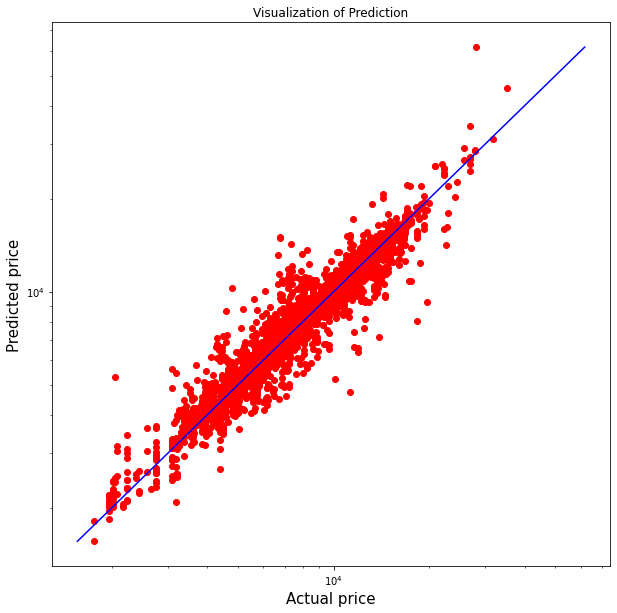

In [81]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,predicted,c='r')
plt.yscale('log')
plt.xscale('log')
plt1 = max(max(predicted),max(y_test))
plt2 = min(min(predicted),min(y_test))
plt.plot([plt1,plt2],[plt1,plt2],'b-')
plt.xlabel('Actual price',fontsize=15)
plt.ylabel('Predicted price',fontsize=15)
plt.title('Visualization of Prediction')
plt.show()

# Test Data

In [82]:
test_data = pd.read_excel("C:/Users/Hrushikesh/Desktop/Flight_Ticket_Participant_Datasets/Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


This test dataset has no target variable, we need to use trained data to get the ticket price prediction.

In [83]:
test_data.shape

(2671, 10)

There are 2671 rows and 10 columns

In [84]:
test_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

All columns have object datatype.We will convert them to numerical data

In [85]:
test_data['Date_of_Journey']= pd.to_datetime(test_data['Date_of_Journey'])
test_data['Dep_Time'] = pd.to_datetime(test_data['Dep_Time'])
test_data['Arrival_Time'] = pd.to_datetime(test_data['Arrival_Time'])

In [86]:
test_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object

Now splitting date of journey into month and day, and data set contain only 2019 year data so no need to take 2019 year column

In [87]:
test_data['Journey_Day'] = pd.to_datetime(test_data.Date_of_Journey,format="%d%m%Y").dt.day
test_data['Journey_Month'] = pd.to_datetime(test_data.Date_of_Journey,format="%d%m%Y").dt.month

In [88]:
test_data.drop("Date_of_Journey",axis=1,inplace=True)

In [89]:
# Duration

test_data['Duration']=test_data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

#now lets convert this column into a numeric

test_data['Duration']=pd.to_numeric(test_data['Duration'])

In [90]:
#Extracting Hours and ,mins from Dep_Time column 
test_data['Dep_Hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_Min'] = pd.to_datetime(test_data['Dep_Time']).dt.minute

In [91]:
test_data.drop("Dep_Time",axis=1,inplace=True)

In [92]:
#Extracting Arrival Hour from Arrival_Time Column
test_data['Arrival_Hour']=pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_Min']=pd.to_datetime(test_data['Arrival_Time']).dt.minute
test_data.drop("Arrival_Time",axis=1,inplace=True)

In [93]:
test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info,24,6,23,55,2,45


In [94]:
test_data.shape

(2671, 13)

In [95]:
for i in test_data.columns:
    print(test_data[i].value_counts())
    print("-\n")

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
-

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
-

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
-

DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD                      164
                              ... 
BOM → GOI → PNQ → HYD            1
BOM → GOI → HYD

In [96]:
test_data['Airline']=test_data['Airline'].replace("Jet Airways Business","Jet Airways")
test_data['Airline']=test_data['Airline'].replace("Multiple carriers Premium economy","Multiple carriers")
test_data['Airline']=test_data['Airline'].replace("Vistara Premium economy","Vistara")
test_data['Destination']= test_data['Destination'].replace("New Delhi","Delhi")
test_data['Additional_Info']= test_data['Additional_Info'].replace("No info", "No Info")
test_data['Additional_Info']= test_data['Additional_Info'].replace(["1 Long layover","2 Long layover"],"Long layover")

In [97]:
val_count = ["Airline","Destination","Additional_Info"]

for i in val_count:
    print(test_data[i].value_counts())
    print("\n")

Jet Airways          899
IndiGo               511
Air India            440
Multiple carriers    350
SpiceJet             208
Vistara              131
Air Asia              86
GoAir                 46
Name: Airline, dtype: int64


Cochin       1145
Banglore      710
Delhi         555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


No Info                         2148
In-flight meal not included      444
No check-in baggage included      76
Business class                     1
Long layover                       1
Change airports                    1
Name: Additional_Info, dtype: int64




In [98]:
test_data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Journey_Day        0
Journey_Month      0
Dep_Hour           0
Dep_Min            0
Arrival_Hour       0
Arrival_Min        0
dtype: int64

In [99]:
test_data.describe()

,Duration,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,2671.00000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000
mean,639.74167,12.026956,5.607263,12.603519,24.891426,13.585174,24.558218
std,502.18693,8.564408,3.042952,5.686673,19.086522,7.040396,16.775436
min,5.00000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,175.00000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,520.00000,6.000000,5.000000,12.000000,25.000000,15.000000,25.000000
75%,915.00000,21.000000,6.000000,18.000000,45.000000,19.000000,35.000000
max,2440.00000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000


This gives the statistical information of the data set

- The count of all columns are same which means there are no missing value present in the data set

- The mean value is greater than median in the column journey day, duration_hour and dep_hour so we can say that they are skewed to the right

- The median is bit greater than mean in Duration_min, Dep_min, Arrival_Hour and Arrival_min which means they are skewed to the left

- We can observe that there is a difference between 75% and max which means some outliers are presernt in the data

In [100]:
# Checking for Categirical columns
categorical_col=[]
for i in test_data.dtypes.index:
    if test_data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [101]:
# Checking for Numerical columns
numerical_col=[]
for i in test_data.dtypes.index:
    if test_data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Duration', 'Journey_Day', 'Journey_Month', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


# Outliers

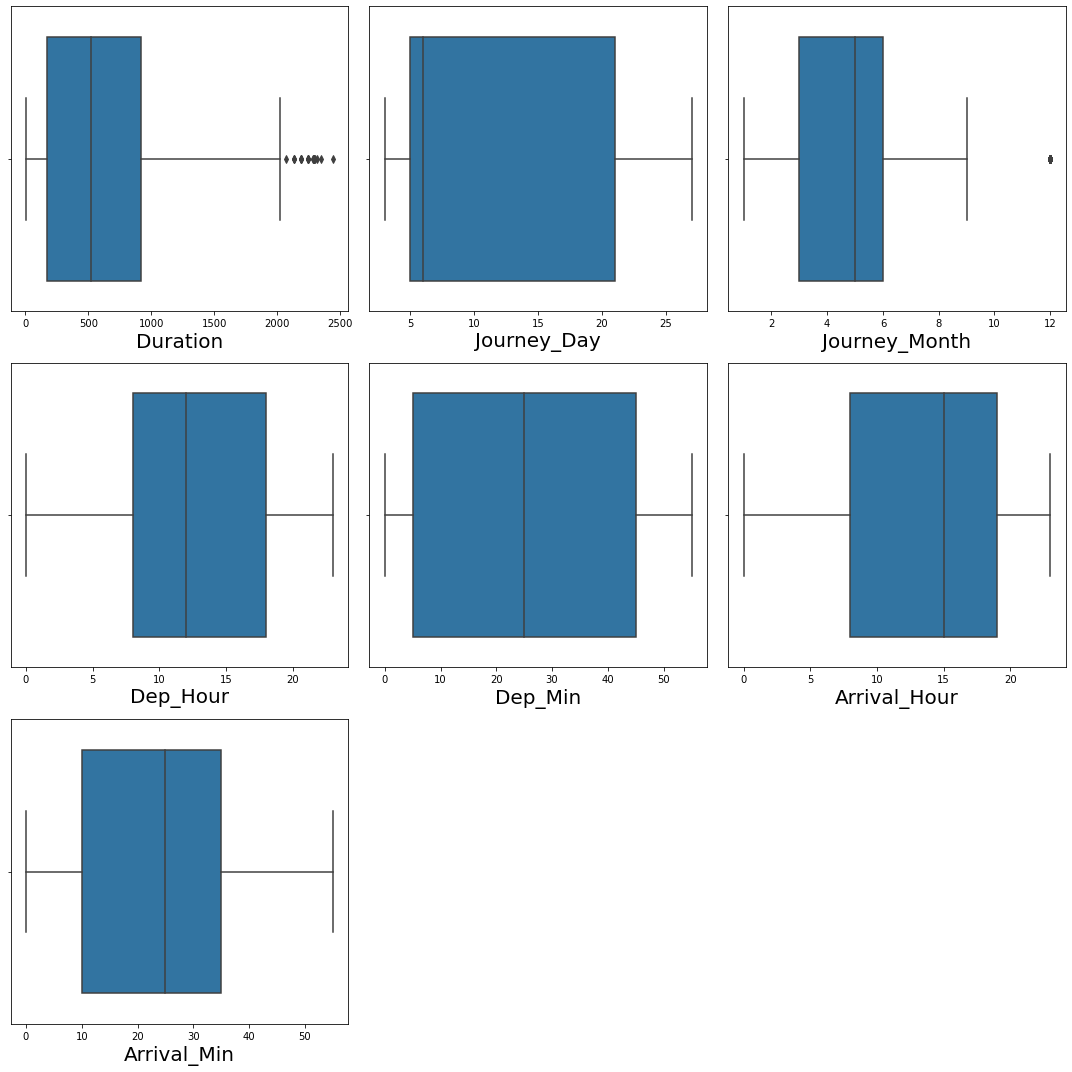

In [102]:
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=8:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(test_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

We can notice outliers in Journey_Month and Duration

In [103]:
from scipy.stats import zscore
features = test_data[['Duration','Journey_Month']]
z = np.abs(zscore(features))
z

array([[0.03038946, 0.12908857],
       [0.79615079, 2.10122721],
       [1.56397015, 0.1996012 ],
       ...,
       [0.48744299, 0.12908857],
       [0.5482219 , 0.12908857],
       [0.43868042, 0.12908857]])

In [104]:
new_test_data = test_data[(z<3).all(axis=1)]
new_test_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No Info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No Info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No Info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No Info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1435,1 stop,No Info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,155,non-stop,No Info,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,395,1 stop,No Info,3,6,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,915,1 stop,No Info,3,6,4,0,19,15


In [105]:
test_data.shape

(2671, 13)

In [106]:
new_test_data.shape

(2653, 13)

In [107]:
loss = (2671-2653)/2671*100
loss

0.6739049045301385

Here we are lossing very less data

In [108]:
new_test_data.skew()

Duration         0.809826
Journey_Day      0.475210
Journey_Month    0.591565
Dep_Hour         0.083357
Dep_Min          0.132681
Arrival_Hour    -0.432551
Arrival_Min      0.110111
dtype: float64

In [109]:
new_test_data['Duration'] = np.log1p(new_test_data['Duration'])
new_test_data['Journey_Month'] = np.log1p(new_test_data['Journey_Month'])

In [110]:
new_test_data.skew()

Duration        -0.229080
Journey_Day      0.475210
Journey_Month   -0.541053
Dep_Hour         0.083357
Dep_Min          0.132681
Arrival_Hour    -0.432551
Arrival_Min      0.110111
dtype: float64

The skewness has been removed.

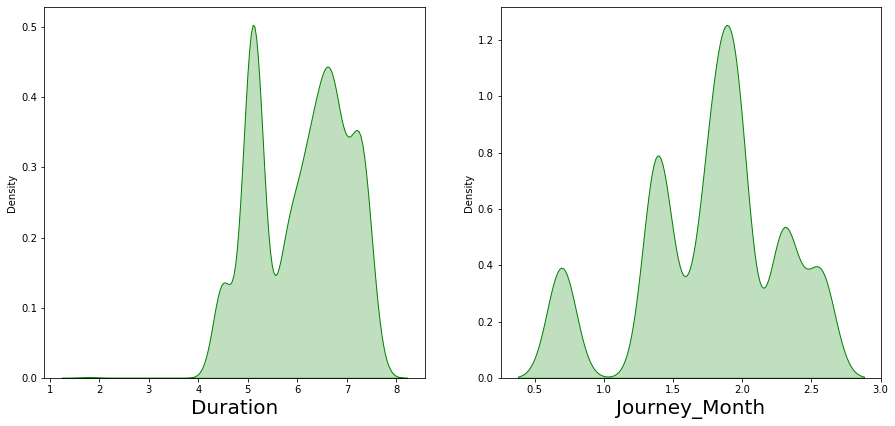

In [111]:
skewed = ["Duration","Journey_Month"]
plt.figure(figsize=(15,15), facecolor='white')
plotnumber = 1

for column in new_test_data[skewed]:
    if plotnumber<=18:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(new_test_data[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We can observe the data is almost normal compared and skewness is also not there

# Encoding

In [112]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
new_test_data[categorical_col]=new_test_data[categorical_col].apply(lbl.fit_transform)

In [113]:
new_test_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,4,2,1,76,6.486161,0,4,6,1.945910,17,30,4,25
1,3,3,0,65,5.484797,0,4,5,2.564949,6,20,10,20
2,4,2,1,76,7.262629,0,2,21,1.791759,19,15,19,0
3,5,2,1,76,6.660575,0,4,21,1.791759,8,0,21,0
4,0,0,2,16,5.141664,4,4,24,1.945910,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,7.269617,0,4,6,1.945910,20,30,20,25
2667,3,3,0,43,5.049856,4,4,27,1.386294,14,20,16,55
2668,4,2,1,76,5.981414,0,4,3,1.945910,21,50,4,25
2669,1,2,1,76,6.820016,0,4,3,1.945910,4,0,19,15


# Standard Scalar


In [114]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_test_data= pd.DataFrame(scaler.fit_transform(new_test_data),columns=new_test_data.columns)
new_test_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,0.233214,0.031440,-0.167242,0.804966,0.438880,-0.791072,0.393727,-0.706193,0.344970,0.766320,0.272445,-1.354818,0.025591
1,-0.348833,0.873978,-1.175634,0.398570,-0.681421,-0.791072,0.393727,-0.823069,1.565339,-1.172433,-0.252462,-0.503215,-0.272182
2,0.233214,0.031440,-0.167242,0.804966,1.307572,-0.791072,-2.166466,1.046954,0.041078,1.118821,-0.514916,0.774190,-1.463273
3,0.815260,0.031440,-0.167242,0.804966,0.634010,-0.791072,0.393727,1.046954,0.041078,-0.819933,-1.302277,1.058057,-1.463273
4,-2.094973,-1.653635,0.841150,-1.411740,-1.065309,1.429790,0.393727,1.397583,0.344970,1.823822,1.584714,-1.638686,1.216682
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,-1.512927,0.873978,-1.175634,-0.118662,1.315390,-0.791072,0.393727,-0.706193,0.344970,1.295071,0.272445,0.916123,0.025591
2649,-0.348833,0.873978,-1.175634,-0.414222,-1.168021,1.429790,0.393727,1.748212,-0.758252,0.237569,-0.252462,0.348388,1.812227
2650,0.233214,0.031440,-0.167242,0.804966,-0.125818,-0.791072,0.393727,-1.056822,0.344970,1.471321,1.322260,-1.354818,0.025591
2651,-1.512927,0.031440,-0.167242,0.804966,0.812389,-0.791072,0.393727,-1.056822,0.344970,-1.524934,-1.302277,0.774190,-0.569955


As we have already noted the saved model after saving the final model. Now let's predict the flight price using test data


In [115]:
Predicted_Price = model.predict(new_test_data)
Predicted_Price

array([14210.076 ,  4339.2075, 12687.831 , ..., 17424.324 , 12669.389 ,
        7734.2153], dtype=float32)

In [116]:
Prediction = pd.DataFrame()
Prediction['Price'] = Predicted_Price
Prediction

,Price
0,14210.076172
1,4339.207520
2,12687.831055
3,10135.000977
4,3378.038818
...,...
2648,9144.186523
2649,5259.421387
2650,17424.324219
2651,12669.388672


In [118]:
Prediction.to_csv("Predicted_Flight_Price_Data.csv",index=False)